In [1]:
import numpy as np
from Part2 import *
import matplotlib.pyplot as plt

# Important note
Actions are encoded as below:
1. move up    = 0 
2. move down  = 1 
3. move left  = 2 
4. move right = 3

# Section 1

## 1-1) Monte Carlo ES

In [2]:
agent = MonteCarloES()
agent.learn()

[3 2 2 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2]


## 1-2) Monte Carlo e-soft

In [5]:
agent = MonteCarloESoft()
agent.learn(epsilon=0.05)

The best policy found is [3 3 2 2 3 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 1 2 2 0 0]


In [2]:
agent = MonteCarloESoft()
agent.learn(epsilon=0.1)

The best policy found is [3 2 2 2 1 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 1 2 2 0 0]


In [3]:
agent = MonteCarloESoft()
agent.learn(epsilon=0.2)

The best policy found is [3 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]


In [4]:
agent = MonteCarloESoft()
agent.learn(epsilon=0.3)

The best policy found is [3 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Section 2

In [2]:
agent = Behavior()
agent.learn(episodes=10**6, max_episode_length=1000)
"""
Running the algorithm for 1e6 episodes of maximum length = 1000 took 4:00 minutes.
The (estimated) optimal policy below was found:
[3 3 2 2 2 1 0 1 0 3 3 3 3 0 2 3 2 2 0 3 0 1 0 1 3]
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

The best policy found is [3 3 2 2 2 1 0 1 0 3 3 3 3 0 2 3 2 2 0 3 0 1 0 1 3]


In [ ]:
agent = Behavior()
agent.learn(episodes=10**7, max_episode_length=1000)
"""
Running the algorithm for 1e7 episodes of maximum length = 1000 took ? minutes.
The (estimated) optimal policy below was found:
?
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

In [ ]:
agent = Behavior()
agent.learn(episodes=10**8, max_episode_length=1000)
"""
Running the algorithm for 1eb8 episodes of maximum length = 1000 took ? minutes.
The (estimated) optimal policy below was found:
?
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

In [6]:
agent = Behavior()
agent.learn(episodes=10**6, max_episode_length=10000)
"""
Running the algorithm for 1e6 episodes of maximum length = 10000 took 3:51 minutes.
The (estimated) optimal policy below was found:
[1 1 2 0 2 1 0 0 1 0 1 0 2 0 0 3 2 2 2 3 0 3 3 0 3]
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

The best policy found is [1 1 2 0 2 1 0 0 1 0 1 0 2 0 0 3 2 2 2 3 0 3 3 0 3]


In [ ]:
agent = Behavior()
agent.learn(episodes=10**7, max_episode_length=10000)
"""
Running the algorithm for 1e7 episodes of maximum length = 10000 took ? minutes.
The (estimated) optimal policy below was found:
?
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

In [ ]:
agent = Behavior()
agent.learn(episodes=10**8, max_episode_length=10000)
"""
Running the algorithm for 1e8 episodes of maximum length = 10000 took ? minutes.
The (estimated) optimal policy below was found:
?
which is clearly not the best policy: it attempts to move outside the grid in some states.
""";

# Section 3: Using policy iteration for optimal policy estimation

## Without permutation 

Counter at termination = 4


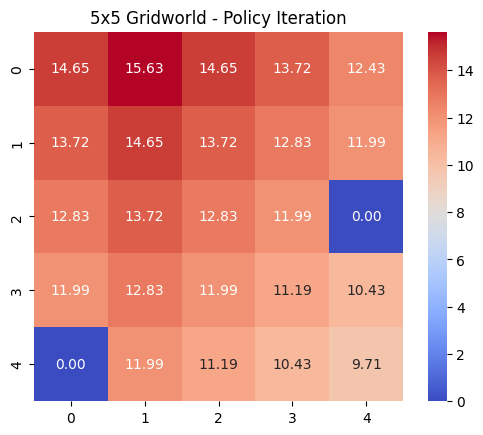

Estimated optimal policy = [3. 1. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 0.]


In [3]:
agent = PolicyIteration(permute=False)
agent.estimate_optimal_policy(patience=1000, reach_patience=False)
visualize_results(agent.value_function, "Policy Iteration")
print(f"Estimated optimal policy = {agent.policy}")
"""
Running the algorithm took 20 seconds to converge.
The optimal policy below was found:
[3. 1. 2. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
This policy does makes sense and seems to be the optimal for this problem.
The state value functions are less than that of question 1 due to the existence of the -0.2 reward for moving between two white blocks and two terminal states. 
""";
# optimal policy: [3. 1. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]

## With permutation 

Counter at termination = 100


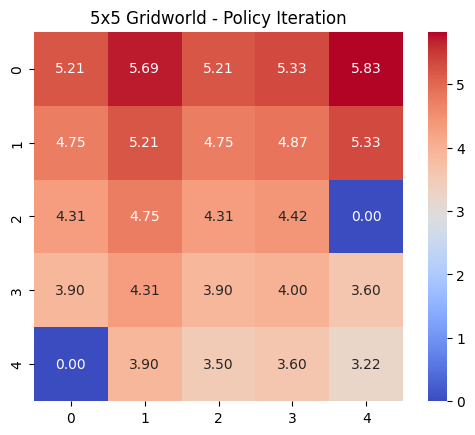

Estimated optimal policy = [3. 1. 2. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 0.]


In [3]:
agent = PolicyIteration(permute=True)
agent.estimate_optimal_policy(patience=100, reach_patience=True)
visualize_results(agent.value_function, "Policy Iteration")
print(f"Optimal policy: {agent.policy}")
"""
Running the algorithm for 100 epochs (even after policy convergence) took 6:25 minutes.
The optimal policy below was found:
[3. 1. 2. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
If the permutation occurs infinitely, the blue and green blocks will spend a similar amount of time in each other's places and the effects of initial positions will diminish. By running the policy iteration algorithm for 100 epochs, the optimal policy seems to be reaching the closest position that yields a reward of +5 or +2.5 and not always going for the blue square.
""";